# TASK-3: UNSUPERVISED MACHINE LEARNING

### ~ SRINIDHI DEVAN

### From the given ‘Iris’ dataset, we will predict the optimum number of clusters and represent it visually.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_samples, silhouette_score

In [2]:
data = pd.read_csv('Iris.csv')

In [3]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
data_new = data.drop(['Id','Species'],axis=1)
data_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
x = data_new.iloc[:, [0,1,2,3]].values

In [6]:
wss =[] 

In [7]:
for i in range(1,11):
    KM = KMeans(n_clusters=i)
    KM.fit(data_new)
    wss.append(KM.inertia_)

In [8]:
wss

[680.8243999999996,
 152.36870647733915,
 78.94084142614601,
 57.317873214285726,
 46.535582051282034,
 38.930963049671746,
 34.190687924796634,
 29.913150993743105,
 27.888869047619057,
 26.484868022476725]

Text(0, 0.5, 'WSS')

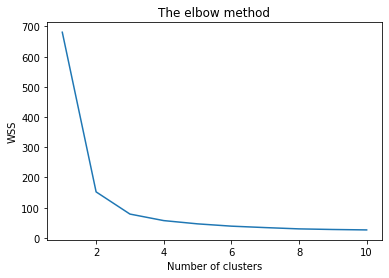

In [9]:
plt.plot(range(1,11), wss);
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS') 

#### The elbow method shows that the optimum number of clusters are 3

In [10]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(data_new)

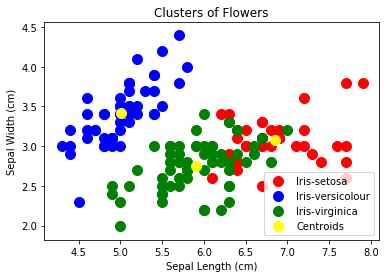

In [11]:
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa');
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour');
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica');
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids');
plt.legend()
plt.title("Clusters of Flowers")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)");

#### SILHOUETTE SCORE

In [12]:
k_means = KMeans(n_clusters = 3)
k_means.fit(data_new)
labels = k_means.labels_

In [13]:
silhouette_score(data_new,labels=k_means.labels_)

0.5525919445499757

#### Since Silhouette is Positive and approx. close to 1, the clustering algorithm has performed well.

In [14]:
sil_width = silhouette_samples(data_new,labels=k_means.labels_)

In [15]:
data_new["sil_width"] = sil_width
data_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,sil_width
0,5.1,3.5,1.4,0.2,0.851573
1,4.9,3.0,1.4,0.2,0.817887
2,4.7,3.2,1.3,0.2,0.830087
3,4.6,3.1,1.5,0.2,0.806591
4,5.0,3.6,1.4,0.2,0.846996
